In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
# Edit this to match <root_output_dir>/results

RESULTS_DIR = 'results' 

In [3]:
def read_result(experiment_name, metric_col_name):
    return pd.read_csv(f'{RESULTS_DIR}/{experiment_name}/experiment.metrics.csv', usecols=[metric_col_name],
                          squeeze=True).rolling(150).mean()

In [4]:
TASKS = [
    ('emnist_cr', 'EMNIST', 'eval/sparse_categorical_accuracy', ([1450, 1505], [0.8415, 0.8495])),
    ('shakespeare', 'Shakespeare', 'eval/accuracy', ([1150, 1205], [0.545, 0.57])),
    ('cifar100', 'CIFAR-100', 'eval/sparse_categorical_accuracy', ([5950, 6005], [0.46, 0.5])),
    ('stackoverflow_nwp', 'Stack Overflow', 'eval/accuracy_no_oov_or_eos', ([1450, 1505], [0.23, 0.25])),
]

METHODS = [('mean', 'FedAvg', '.'), ('fetch_sgd', 'FetchSGD', '+'),  ('terngrad', 'TernGrad', 'v'),
           ('hadamard_quantization', 'Hadamard', 'x'), ('kashin_quantization', 'Kashin', 'o'),
           ('drive', 'DRIVE', 'd'), ('drive_plus', 'DRIVE+', 's')]

In [5]:
all_results = {}
for task, title, metric_col_name, _ in TASKS:
    all_results[task] = [(read_result(f'{task}_{method}', metric_col_name), method_title, marker) for method, method_title, marker in METHODS]

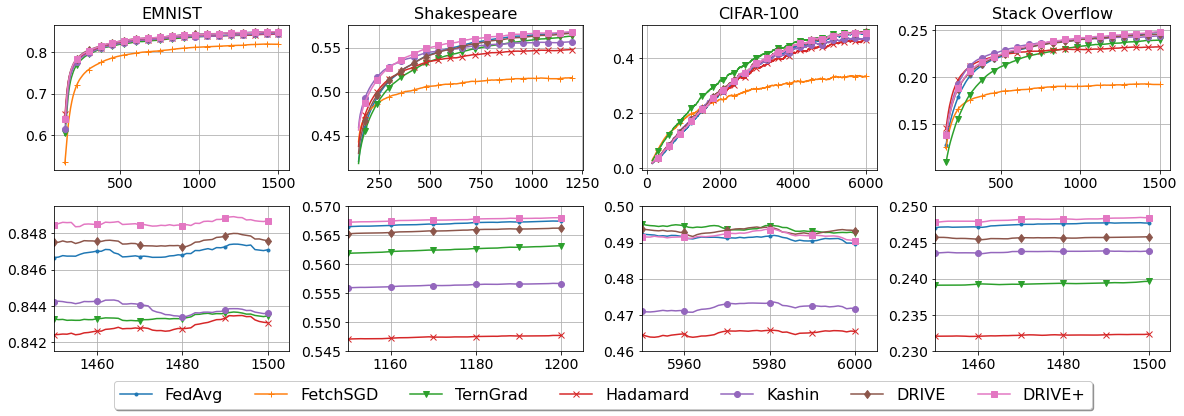

In [6]:
import matplotlib


matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
#figsize=(15, 10),  gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
fig, axs = plt.subplots(2, 4, figsize=(20, 6),  gridspec_kw={'hspace': 0.25, 'wspace': 0.25})
for (task, title, metric_col_name, _), ax in zip(TASKS, axs[0]):
    ax.set_title(title, fontsize=16)
    for (task_series, method_title, marker) in all_results[task]:
        task_series.plot(ax=ax, legend=False, marker=marker, label=method_title, markevery=task_series.size // 20)
    ax.grid()
    
for (task, title, metric_col_name, (xlim, ylim)), ax in zip(TASKS, axs[1]):
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    for (task_series, method_title, marker) in all_results[task]:
        task_series.plot(ax=ax, legend=False, marker=marker, label=method_title, markevery=10)
    ax.grid()

plt.legend(fontsize=16, ncol=8, shadow=True, bbox_to_anchor=(0.7, -0.15))

# (uncomment to save the figure):
# fig.savefig('fl_experiments.svg', format='svg', bbox_inches='tight')